In [1]:
import numpy as np

#read in files
ats = []
Csca = np.zeros((146,146))
MD_corr = np.zeros((186,186))
ics = []

ats_infile =open("ats.txt")
for line in ats_infile:
    if len(line) >0:
        ats.append(line.replace("\n",""))

csca_infile = open("csca.csv")
i=0
for line in csca_infile:
    split_line = line.split(",")
    j=0
    for val in split_line:
        if len(val.replace("\n","")) > 0:
            Csca[i,j] = float(val)
            j += 1
    i += 1
    
ics_infile = open("ics_3ql3_95.csv")
for line in ics_infile:
    split_line = line.split(":")[1].split(",")
    ic_list = []
    for val in split_line:
        if val != "-" and len(val.replace("\n","")) > 0:
            ic_list.append(val)
    ics.append(ic_list)
    
            
md_corr_infile = open("3ql3_correl_30ns.dat")
i = 0
for line in md_corr_infile:
    j=0
    split_line = line.split(" ")
    for val in split_line:
        if len(val.replace("\n","")) > 0:
            MD_corr[i,j] = float(val)
            j += 1
    i += 1

Csca_keep_index = []
ats_keep = []
for i in range(0, len(ats)):
    if ats[i] != "-":
        Csca_keep_index.append(i)
        ats_keep.append(int(ats[i]))
        
Csca_keep = Csca[Csca_keep_index,:]
Csca_keep = Csca_keep[:,Csca_keep_index]
print(Csca_keep.shape)

MD_corr_keep = MD_corr[ats_keep,:]
MD_corr_keep = MD_corr_keep[:,ats_keep]
print(MD_corr_keep.shape)

# Filter out positions where i and j are within two steps of each other and i equals j
mask_exclude = np.abs(np.subtract.outer(ats_keep, ats_keep)) <= 2
mask_exclude |= np.eye(mask_exclude.shape[0], dtype=bool)  # Exclude positions where i equals j

# Apply the mask to both arrays
Csca_keep_filtered = Csca_keep[~mask_exclude]
MD_corr_keep_filtered = MD_corr_keep[~mask_exclude]

# Read the list of alpha carbon pairs from the file
ac_pairs_file = 'ac_pairs_3ql3_5a.txt'
ac_pairs = []
with open(ac_pairs_file, 'r') as file:
    for line in file:
        parts = line.strip().split(' - ')
        if len(parts) == 2:
            ac_pairs.append((int(parts[0]), int(parts[1])))

(144, 144)
(144, 144)


In [2]:
import numpy as np

#read in files
ats_3ql0 = []
Csca_3ql0 = np.zeros((146,146))
MD_corr_3ql0 = np.zeros((159,159))
ics_3ql0 = []

ats_infile_3ql0 =open("ats_3ql0.txt")
for line in ats_infile_3ql0:
    if len(line) >0:
        ats_3ql0.append(line.replace("\n",""))

csca_infile_3ql0 = open("csca.csv")
i=0
for line in csca_infile_3ql0:
    split_line_3ql0 = line.split(",")
    j=0
    for val in split_line_3ql0:
        if len(val.replace("\n","")) > 0:
            Csca_3ql0[i,j] = float(val)
            j += 1
    i += 1
    
ics_infile_3ql0 = open("ics_3ql3_95.csv")
for line in ics_infile_3ql0:
    split_line_3ql0 = line.split(":")[1].split(",")
    ic_list_3ql0 = []
    for val in split_line_3ql0:
        if val != "-" and len(val.replace("\n","")) > 0:
            ic_list_3ql0.append(val)
    ics_3ql0.append(ic_list_3ql0)
    
            
md_corr_infile_3ql0 = open("3ql0_correl_30ns.dat")
i = 0
for line in md_corr_infile_3ql0:
    j=0
    split_line_3ql0 = line.split(" ")
    for val in split_line_3ql0:
        if len(val.replace("\n","")) > 0:
            MD_corr_3ql0[i,j] = float(val)
            j += 1
    i += 1

Csca_keep_index_3ql0 = []
ats_keep_3ql0 = []
for i in range(0, len(ats_3ql0)):
    if ats_3ql0[i] != "-":
        Csca_keep_index_3ql0.append(i)
        ats_keep_3ql0.append(int(ats_3ql0[i]))
        
Csca_keep_3ql0 = Csca_3ql0[Csca_keep_index_3ql0,:]
Csca_keep_3ql0 = Csca_keep_3ql0[:,Csca_keep_index_3ql0]
print(Csca_keep_3ql0.shape)

MD_corr_keep_3ql0 = MD_corr_3ql0[ats_keep_3ql0,:]
MD_corr_keep_3ql0 = MD_corr_keep_3ql0[:,ats_keep_3ql0]
print(MD_corr_keep_3ql0.shape)

# Filter out positions where i and j are within two steps of each other and i equals j
mask_exclude_3ql0 = np.abs(np.subtract.outer(ats_keep_3ql0, ats_keep_3ql0)) <= 2
mask_exclude_3ql0 |= np.eye(mask_exclude_3ql0.shape[0], dtype=bool)  # Exclude positions where i equals j

# Apply the mask to both arrays
Csca_keep_filtered_3ql0 = Csca_keep_3ql0[~mask_exclude_3ql0]
MD_corr_keep_filtered_3ql0 = MD_corr_keep_3ql0[~mask_exclude_3ql0]

# Read the list of alpha carbon pairs from the file
ac_pairs_file_3ql0 = 'ac_pairs_3ql0_5a.txt'
ac_pairs_3ql0 = []
with open(ac_pairs_file_3ql0, 'r') as file:
    for line in file:
        parts = line.strip().split(' - ')
        if len(parts) == 2:
            ac_pairs_3ql0.append((int(parts[0]), int(parts[1])))

(144, 144)
(144, 144)


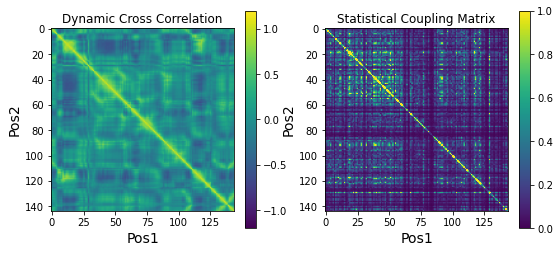

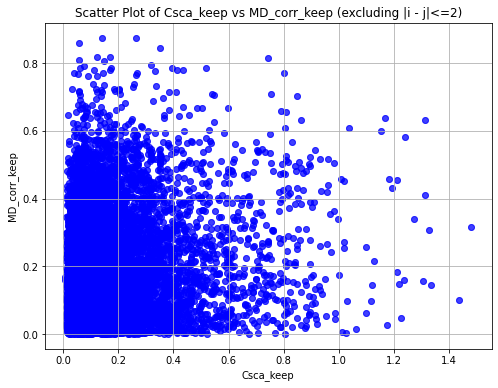

In [3]:
import matplotlib.pyplot as plt
#image MD and Csca matrix
plt.rcParams['figure.figsize'] = 9, 4
plt.subplot(121)
plt.imshow(MD_corr_keep, vmin=-1.2,vmax=1.2); plt.colorbar();
plt.xlabel('Pos1', fontsize=14)
plt.ylabel('Pos2', fontsize=14)
plt.title("Dynamic Cross Correlation")
plt.savefig("Dynamic_Correlation_Matrix.png")
plt.subplot(122)
plt.imshow(Csca_keep, vmin=0, vmax=1); plt.colorbar();
plt.xlabel('Pos1', fontsize=14)
plt.ylabel('Pos2', fontsize=14)
plt.title("Statistical Coupling Matrix")
plt.savefig("Statistical_Coupling_Matrix.png")

#Create scatter plot after removing positions where i = j
plt.figure(figsize=(8, 6))
plt.scatter(Csca_keep_filtered, abs(MD_corr_keep_filtered), c='b', alpha=0.5)
plt.xlabel('Csca_keep')
plt.ylabel('MD_corr_keep')
plt.title('Scatter Plot of Csca_keep vs MD_corr_keep (excluding |i - j|<=2)')
plt.grid(True)

plt.show()

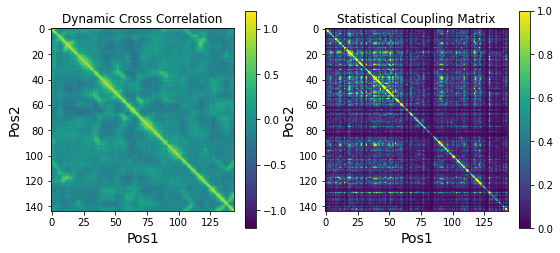

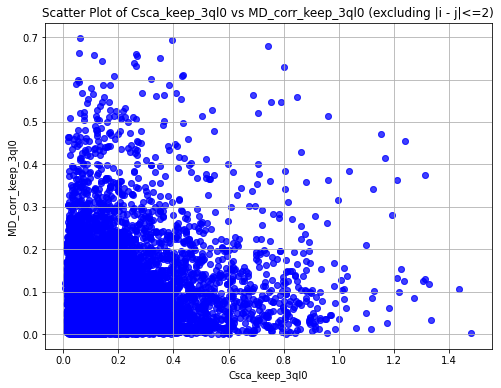

In [4]:
import matplotlib.pyplot as plt

# Image MD and Csca matrix
plt.rcParams['figure.figsize'] = 9, 4
plt.subplot(121)
plt.imshow(MD_corr_keep_3ql0, vmin=-1.2, vmax=1.2)
plt.colorbar()
plt.xlabel('Pos1', fontsize=14)
plt.ylabel('Pos2', fontsize=14)
plt.title("Dynamic Cross Correlation")
plt.savefig("Dynamic_Correlation_Matrix_3ql0.png")
plt.subplot(122)
plt.imshow(Csca_keep_3ql0, vmin=0, vmax=1)
plt.colorbar()
plt.xlabel('Pos1', fontsize=14)
plt.ylabel('Pos2', fontsize=14)
plt.title("Statistical Coupling Matrix")
plt.savefig("Statistical_Coupling_Matrix_3ql0.png")

# Create scatter plot after removing positions where i = j
plt.figure(figsize=(8, 6))
plt.scatter(Csca_keep_filtered_3ql0, abs(MD_corr_keep_filtered_3ql0), c='b', alpha=0.5)
plt.xlabel('Csca_keep_3ql0')
plt.ylabel('MD_corr_keep_3ql0')
plt.title('Scatter Plot of Csca_keep_3ql0 vs MD_corr_keep_3ql0 (excluding |i - j|<=2)')
plt.grid(True)

plt.show()

Averages of the distributions:
IC1: 0.184296875
IC2: 0.26761797752808986
IC3: 0.25324
IC4: 0.2222941176470588
not in same IC: 0.18869158395368074
no IC: 0.18217109714838087
any IC: 0.2307340425531915


/tmp/ipykernel_227966/142727425.py:207: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ic_plot_labels)


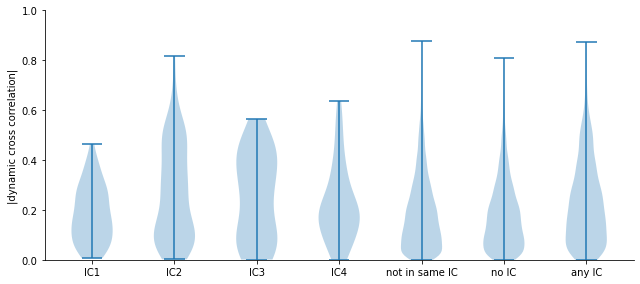

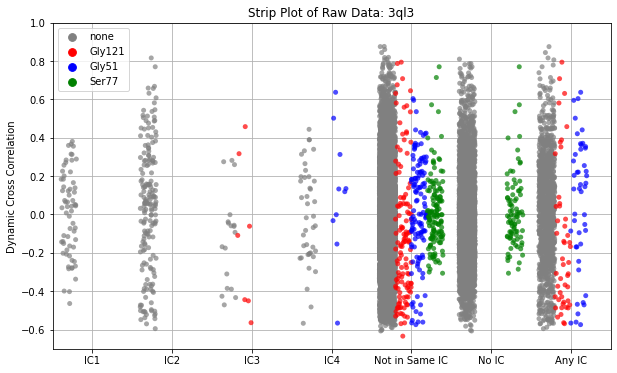


Mann_WhitneyU Test
P-value for No IC vs IC 1: 0.4429576680406664
P-value for No IC vs IC 2: 1.798387839597888e-08
P-value for No IC vs IC 3: 0.04803202100333633
P-value for No IC vs IC 4: 0.04503309888038637
P-value for Not in same IC vs IC 1: 0.6165626626716442
P-value for Not in same IC vs IC 2: 1.2976113171879752e-07
P-value for Not in same IC vs IC 3: 0.0707857818422374
P-value for Not in same IC vs IC 4: 0.07716347944703313

Mann-Whitney U Statistic: 2.9416005e+06
P-value for No IC vs Any IC: 3.4588716264520097e-18


In [5]:
# Define necessary functions
from  scipy.stats import pearsonr, spearmanr, f_oneway
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


#within IC correlations statistical analysis

def inSameIC(i,j):
    if whichIC(i) == whichIC(j) and whichIC(i) != -1:
        return True
    return False

def inAnyIC(i):
    for ic in ics:
        if str(i) in ic:
            return True
    return False

def whichIC(i):
    j=1
    for ic in ics:
        if str(i) in ic:
            return j
        j+=1
    return -1



individual_ic_correlation = {}
for i in range(1, len(ics)+1):
    individual_ic_correlation[i] = []
any_ic_correlation = []
no_ic_correlation = []
not_same_ic_correlation = []

individual_ic_correlation_pair = {}
for i in range(1, len(ics)+1):
    individual_ic_correlation_pair[i] = []
any_ic_correlation_pair = []
no_ic_correlation_pair = []
not_same_ic_correlation_pair = []
color_list = []


def withinDistance(i, j, distance):
    if abs(i - j) <= distance or abs(j - i) <= distance:
        return True
    return False

# Update the loop to filter out pairs of positions within the specified distance
for i in range(0, Csca_keep.shape[0]):
    for j in range(i+1, Csca_keep.shape[0]):
        if not withinDistance(ats_keep[i], ats_keep[j], 2):  # Adjust distance threshold as needed
            if (ats_keep[i], ats_keep[j]) not in ac_pairs:
                #print((ats_keep[i], ats_keep[j]))
                continue
            if inSameIC(ats_keep[i], ats_keep[j]):
                individual_ic_correlation[whichIC(ats_keep[i])].append(MD_corr_keep[i,j])
                individual_ic_correlation_pair[whichIC(ats_keep[i])].append((ats_keep[i],ats_keep[j]))
                any_ic_correlation.append(MD_corr_keep[i,j])
                any_ic_correlation_pair.append((ats_keep[i],ats_keep[j]))
            elif inAnyIC(ats_keep[i]) and inAnyIC(ats_keep[j]):
                any_ic_correlation.append(MD_corr_keep[i,j])
                any_ic_correlation_pair.append((ats_keep[i],ats_keep[j]))
                not_same_ic_correlation.append(MD_corr_keep[i,j])
                not_same_ic_correlation_pair.append((ats_keep[i],ats_keep[j]))
            elif inAnyIC(ats_keep[i]) or inAnyIC(ats_keep[j]):
                not_same_ic_correlation.append(MD_corr_keep[i,j])
                not_same_ic_correlation_pair.append((ats_keep[i],ats_keep[j]))
            else:
                no_ic_correlation.append(MD_corr_keep[i,j])
                no_ic_correlation_pair.append((ats_keep[i],ats_keep[j]))
                not_same_ic_correlation.append(MD_corr_keep[i,j])
                not_same_ic_correlation_pair.append((ats_keep[i],ats_keep[j]))

# to make violin plot           
          
ic_plot_data = [abs(np.array(individual_ic_correlation[1])), abs(np.array(individual_ic_correlation[2])), abs(np.array(individual_ic_correlation[3])), \
               abs(np.array(individual_ic_correlation[4])),abs(np.array(not_same_ic_correlation)),abs(np.array(no_ic_correlation)),abs(np.array(any_ic_correlation))]
ic_plot_labels = ["","IC1", "IC2", "IC3", "IC4", "not in same IC", "no IC", "any IC"]

# Calculate and print the averages for each section
ic_averages = {
    "IC1": np.mean(abs(np.array(individual_ic_correlation[1]))),
    "IC2": np.mean(abs(np.array(individual_ic_correlation[2]))),
    "IC3": np.mean(abs(np.array(individual_ic_correlation[3]))),
    "IC4": np.mean(abs(np.array(individual_ic_correlation[4]))),
    "not in same IC": np.mean(abs(np.array(not_same_ic_correlation))),
    "no IC": np.mean(abs(np.array(no_ic_correlation))),
    "any IC": np.mean(abs(np.array(any_ic_correlation))),
}

print("Averages of the distributions:")
for label, avg in ic_averages.items():
    print(f"{label}: {avg}")

IC_list = []
corr_list = []
for i in abs(np.array(individual_ic_correlation[1])):
    IC_list.append("1")
    corr_list.append(i)
    
for i in abs(np.array(individual_ic_correlation[2])):
    IC_list.append("2")
    corr_list.append(i)
    
for i in abs(np.array(individual_ic_correlation[3])):
    IC_list.append("3")
    corr_list.append(i)
    
for i in abs(np.array(individual_ic_correlation[4])):
    IC_list.append("4")
    corr_list.append(i)
    
for i in abs(np.array(not_same_ic_correlation)):
    IC_list.append("not in same IC")
    corr_list.append(i)

for i in abs(np.array(no_ic_correlation)):
    IC_list.append("no IC")
    corr_list.append(i)

for i in abs(np.array(any_ic_correlation)):
    IC_list.append("any IC")
    corr_list.append(i)
    
for [i,j] in abs(np.array(individual_ic_correlation_pair[1])):
    if i == 51 or j == 51:
        color_list.append('blue')
    elif i == 77 or j ==77:
        color_list.append('green')
    elif i == 121 or j == 121:
        color_list.append('red')
    else:
        color_list.append('grey')

for [i,j] in abs(np.array(individual_ic_correlation_pair[2])):
    if i == 51 or j == 51:
        color_list.append('blue')
    elif i == 77 or j ==77:
        color_list.append('green')
    elif i == 121 or j == 121:
        color_list.append('red')
    else:
        color_list.append('grey')

for [i,j] in abs(np.array(individual_ic_correlation_pair[3])):
    if i == 51 or j == 51:
        color_list.append('blue')
    elif i == 77 or j ==77:
        color_list.append('green')
    elif i == 121 or j == 121:
        color_list.append('red')
    else:
        color_list.append('grey')

for (i,j) in abs(np.array(individual_ic_correlation_pair[4])):
    if i == 51 or j == 51:
        color_list.append('blue')
    elif i == 77 or j ==77:
        color_list.append('green')
    elif i == 121 or j == 121:
        color_list.append('red')
    else:
        color_list.append('grey')

for (i,j) in abs(np.array(not_same_ic_correlation_pair)):
    if i == 51 or j == 51:
        color_list.append('blue')
    elif i == 77 or j ==77:
        color_list.append('green')
    elif i == 121 or j == 121:
        color_list.append('red')
    else:
        color_list.append('grey')
        
for [i,j] in abs(np.array(no_ic_correlation_pair)):
    if i == 51 or j == 51:
        color_list.append('blue')
    elif i == 77 or j ==77:
        color_list.append('green')
    elif i == 121 or j == 121:
        color_list.append('red')
    else:
        color_list.append('grey')
        
for [i,j] in abs(np.array(any_ic_correlation_pair)):
    if i == 51 or j == 51:
        color_list.append('blue')
    elif i == 77 or j ==77:
        color_list.append('green')
    elif i == 121 or j == 121:
        color_list.append('red')
    else:
        color_list.append('grey')      
        
    
data = {"correlation":corr_list, "IC_label":IC_list}
df = pd.DataFrame(data)

plt.figure()
ax = plt.subplot(111)
ax.violinplot(ic_plot_data)
ax.set_xticklabels(ic_plot_labels)
ax.set_xlabel("")
ax.set_ylabel("|dynamic cross correlation|")
ax.set_title("")
plt.tight_layout()
ax = plt.gca()  # Get current axis
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.ylim(0,1.0)
plt.savefig("DCC_by_IC.pdf", dpi=1200)
plt.show()




# to make strip plot

# Combine data for each IC into a single list
ic_data = []
ic_labels_2 = []

for ic_label, data in individual_ic_correlation.items():
    ic_data.extend(data)
    ic_labels_2.extend([f'IC{ic_label}'] * len(data))

# Add data for "not in same IC" category
ic_data.extend(not_same_ic_correlation)
ic_labels_2.extend(['Not in Same IC'] * len(not_same_ic_correlation))

# Add data for "no IC" category
ic_data.extend(no_ic_correlation)
ic_labels_2.extend(['No IC'] * len(no_ic_correlation))

# Add data for "any IC" category
ic_data.extend(any_ic_correlation)
ic_labels_2.extend(['Any IC'] * len(any_ic_correlation))


# Create a DataFrame for seaborn
df = pd.DataFrame({'Correlation': ic_data, 'IC_label': ic_labels_2, 'color':color_list})

custom_legend_labels = {'red': 'Gly121', 'green': 'Ser77', 'blue': 'Gly51', 'grey': 'none'}

# Plot strip plot for each IC category
plt.figure(figsize=(10, 6))
stripplot = sns.stripplot(data=df, x='IC_label', y='Correlation', hue='color', palette={key: key for key in df['color'].unique()}, jitter=0.4, dodge=True, alpha=0.7)
plt.xlabel('')
plt.ylabel('Dynamic Cross Correlation')
plt.title('Strip Plot of Raw Data: 3ql3')
plt.grid(True)
plt.ylim(-0.7,1.0)

# Update the legend
handles, labels = stripplot.get_legend_handles_labels()
new_labels = [custom_legend_labels[label] for label in labels]
stripplot.legend(handles, new_labels)
plt.savefig('dot_plot_3ql3.png', dpi=1200)
plt.show()

from scipy.stats import mannwhitneyu

# Perform Mann-Whitney U test for each IC category
mwu_results = {}
for ic_label, data in individual_ic_correlation.items():
    mwu_statistic, p_value = mannwhitneyu([abs(x) for x in data], [abs(x) for x in no_ic_correlation])
    mwu_results[ic_label] = (mwu_statistic, p_value)

print("")
print("Mann_WhitneyU Test")
# Print the Mann-Whitney U statistic and p-values for each IC category
for ic_label, (mwu_statistic, p_value) in mwu_results.items():
    print(f"P-value for No IC vs IC {ic_label}: {p_value}")

# Perform Mann-Whitney U test for each IC category
mwu_results_not_ic = {}
for ic_label, data in individual_ic_correlation.items():
    mwu_statistic, p_value = mannwhitneyu([abs(x) for x in data], [abs(x) for x in not_same_ic_correlation])
    mwu_results_not_ic[ic_label] = (mwu_statistic, p_value)

# Print the Mann-Whitney U statistic and p-values for each IC category
for ic_label, (mwu_statistic, p_value) in mwu_results_not_ic.items():
    print(f"P-value for Not in same IC vs IC {ic_label}: {p_value}")    

# Perform Mann-Whitney U test between "any IC" and "no IC" categories
mwu_statistic, p_value = mannwhitneyu(abs(np.array(any_ic_correlation)), abs(np.array(no_ic_correlation)), alternative='two-sided')

# Print the Mann-Whitney U statistic and p-value
print("")
print("Mann-Whitney U Statistic:", mwu_statistic)
print("P-value for No IC vs Any IC:", p_value)


significant_pairs = []

for i in range(0, Csca_keep.shape[0]):
    for j in range(i + 1, Csca_keep.shape[0]):
        # Check if the pair of positions are not within a distance of 2 from each other
        if not withinDistance(ats_keep[i], ats_keep[j], 2):
            # Check if the correlation is significant
            if not inSameIC(ats_keep[i], ats_keep[j]):
                if MD_corr_keep[i, j] > 0.8 or MD_corr_keep[i, j] < -0.6:
                    I = ats_keep[i]
                    J = ats_keep[j]
                    significant_pairs.append((I, J))

# Print the significant position pairs
#print("Significant position pairs with correlations > 0.8 or < -0.6, and not within 2 positions of each other:")
#for pair in significant_pairs:
    #print(pair)

Averages of the distributions:
IC1: 0.11890625
IC2: 0.12969662921348313
IC3: 0.10978947368421052
IC4: 0.09768627450980392
not in same IC: 0.09741831146016326
no IC: 0.09667328605200945
any IC: 0.1150357751277683


/tmp/ipykernel_227966/2525698265.py:202: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax_3ql0.set_xticklabels(ic_plot_labels_3ql0)


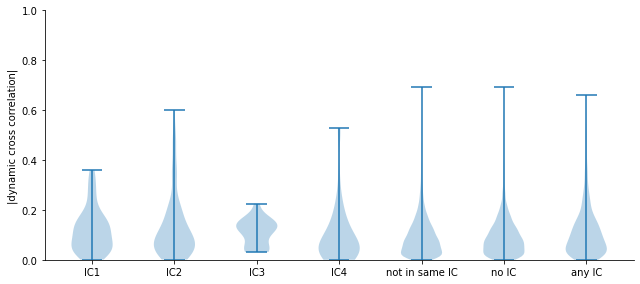

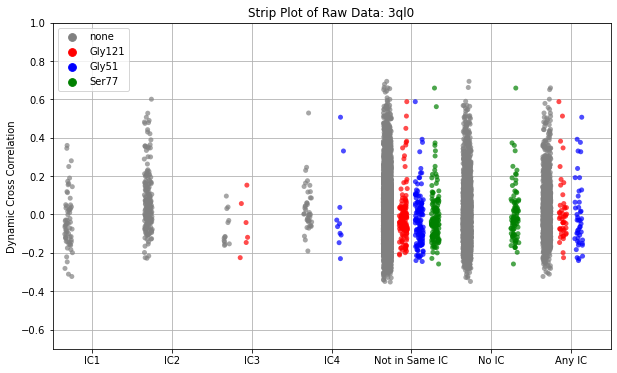


Mann_WhitneyU Test
P-value for No IC vs IC 1: 0.02679217474105738
P-value for No IC vs IC 2: 0.009224939138718777
P-value for No IC vs IC 3: 0.1021049396839344
P-value for No IC vs IC 4: 0.21940712802659024
P-value for Not in same IC vs IC 1: 0.024518501400723966
P-value for Not in same IC vs IC 2: 0.006634678994127943
P-value for Not in same IC vs IC 3: 0.10267070079830959
P-value for Not in same IC vs IC 4: 0.2526299505819736

Mann-Whitney U Statistic: 2.667697e+06
P-value for No IC vs Any IC: 9.419469461462703e-05
Significant position pairs with correlations > 0.8 or < -0.6, and not within 2 positions of each other:
(14, 18)
(14, 123)
(15, 18)
(77, 80)
(78, 81)
(79, 82)
(79, 83)
(80, 83)


In [6]:
# Define necessary functions
from scipy.stats import pearsonr, spearmanr, f_oneway
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#within IC correlations statistical analysis

def inSameIC_3ql0(i, j):
    if whichIC_3ql0(i) == whichIC_3ql0(j) and whichIC_3ql0(i) != -1:
        return True
    return False

def inAnyIC_3ql0(i):
    for ic in ics_3ql0:
        if str(i) in ic:
            return True
    return False

def whichIC_3ql0(i):
    j = 1
    for ic in ics_3ql0:
        if str(i) in ic:
            return j
        j += 1
    return -1

individual_ic_correlation_3ql0 = {}
for i in range(1, len(ics_3ql0) + 1):
    individual_ic_correlation_3ql0[i] = []
any_ic_correlation_3ql0 = []
no_ic_correlation_3ql0 = []
not_same_ic_correlation_3ql0 = []

individual_ic_correlation_pair_3ql0 = {}
for i in range(1, len(ics_3ql0) + 1):
    individual_ic_correlation_pair_3ql0[i] = []
any_ic_correlation_pair_3ql0 = []
no_ic_correlation_pair_3ql0 = []
not_same_ic_correlation_pair_3ql0 = []
color_list_3ql0 = []

def withinDistance_3ql0(i, j, distance):
    if abs(i - j) <= distance or abs(j - i) <= distance:
        return True
    return False

# Update the loop to filter out pairs of positions within the specified distance
for i in range(0, Csca_keep_3ql0.shape[0]):
    for j in range(i + 1, Csca_keep_3ql0.shape[0]):
        if not withinDistance(ats_keep_3ql0[i], ats_keep_3ql0[j], 2):  # Adjust distance threshold as needed
            if (ats_keep_3ql0[i], ats_keep_3ql0[j]) not in ac_pairs_3ql0:
                #print((ats_keep[i], ats_keep[j]))
                continue
            if inSameIC_3ql0(ats_keep_3ql0[i], ats_keep_3ql0[j]):
                individual_ic_correlation_3ql0[whichIC_3ql0(ats_keep_3ql0[i])].append(MD_corr_keep_3ql0[i, j])
                individual_ic_correlation_pair_3ql0[whichIC_3ql0(ats_keep_3ql0[i])].append((ats_keep_3ql0[i], ats_keep_3ql0[j]))
                any_ic_correlation_3ql0.append(MD_corr_keep_3ql0[i, j])
                any_ic_correlation_pair_3ql0.append((ats_keep_3ql0[i], ats_keep_3ql0[j]))
            elif inAnyIC_3ql0(ats_keep_3ql0[i]) and inAnyIC_3ql0(ats_keep_3ql0[j]):
                any_ic_correlation_3ql0.append(MD_corr_keep_3ql0[i, j])
                any_ic_correlation_pair_3ql0.append((ats_keep_3ql0[i], ats_keep_3ql0[j]))
                not_same_ic_correlation_3ql0.append(MD_corr_keep_3ql0[i, j])
                not_same_ic_correlation_pair_3ql0.append((ats_keep_3ql0[i], ats_keep_3ql0[j]))
            elif inAnyIC_3ql0(ats_keep_3ql0[i]) or inAnyIC_3ql0(ats_keep_3ql0[j]):
                not_same_ic_correlation_3ql0.append(MD_corr_keep_3ql0[i, j])
                not_same_ic_correlation_pair_3ql0.append((ats_keep_3ql0[i], ats_keep_3ql0[j]))
            else:
                no_ic_correlation_3ql0.append(MD_corr_keep_3ql0[i, j])
                no_ic_correlation_pair_3ql0.append((ats_keep_3ql0[i], ats_keep_3ql0[j]))
                not_same_ic_correlation_3ql0.append(MD_corr_keep_3ql0[i, j])
                not_same_ic_correlation_pair_3ql0.append((ats_keep_3ql0[i], ats_keep_3ql0[j]))

# To make violin plot

ic_plot_data_3ql0 = [abs(np.array(individual_ic_correlation_3ql0[1])), abs(np.array(individual_ic_correlation_3ql0[2])), abs(np.array(individual_ic_correlation_3ql0[3])), \
               abs(np.array(individual_ic_correlation_3ql0[4])), abs(np.array(not_same_ic_correlation_3ql0)), abs(np.array(no_ic_correlation_3ql0)), abs(np.array(any_ic_correlation_3ql0))]
ic_plot_labels_3ql0 = ["", "IC1", "IC2", "IC3", "IC4", "not in same IC", "no IC", "any IC"]

# Calculate and print the averages for each section
ic_averages_3ql0 = {
    "IC1": np.mean(abs(np.array(individual_ic_correlation_3ql0[1]))),
    "IC2": np.mean(abs(np.array(individual_ic_correlation_3ql0[2]))),
    "IC3": np.mean(abs(np.array(individual_ic_correlation_3ql0[3]))),
    "IC4": np.mean(abs(np.array(individual_ic_correlation_3ql0[4]))),
    "not in same IC": np.mean(abs(np.array(not_same_ic_correlation_3ql0))),
    "no IC": np.mean(abs(np.array(no_ic_correlation_3ql0))),
    "any IC": np.mean(abs(np.array(any_ic_correlation_3ql0))),
}

print("Averages of the distributions:")
for label, avg in ic_averages_3ql0.items():
    print(f"{label}: {avg}")

IC_list_3ql0 = []
corr_list_3ql0 = []
for i in abs(np.array(individual_ic_correlation_3ql0[1])):
    IC_list_3ql0.append("1")
    corr_list_3ql0.append(i)

for i in abs(np.array(individual_ic_correlation_3ql0[2])):
    IC_list_3ql0.append("2")
    corr_list_3ql0.append(i)

for i in abs(np.array(individual_ic_correlation_3ql0[3])):
    IC_list_3ql0.append("3")
    corr_list_3ql0.append(i)

for i in abs(np.array(individual_ic_correlation_3ql0[4])):
    IC_list_3ql0.append("4")
    corr_list_3ql0.append(i)

for i in abs(np.array(not_same_ic_correlation_3ql0)):
    IC_list_3ql0.append("not in same IC")
    corr_list_3ql0.append(i)

for i in abs(np.array(no_ic_correlation_3ql0)):
    IC_list_3ql0.append("no IC")
    corr_list_3ql0.append(i)

for i in abs(np.array(any_ic_correlation_3ql0)):
    IC_list_3ql0.append("any IC")
    corr_list_3ql0.append(i)

for [i, j] in abs(np.array(individual_ic_correlation_pair_3ql0[1])):
    if i == 51 or j == 51:
        color_list_3ql0.append('blue')
    elif i == 77 or j == 77:
        color_list_3ql0.append('green')
    elif i == 121 or j == 121:
        color_list_3ql0.append('red')
    else:
        color_list_3ql0.append('grey')

for [i, j] in abs(np.array(individual_ic_correlation_pair_3ql0[2])):
    if i == 51 or j == 51:
        color_list_3ql0.append('blue')
    elif i == 77 or j == 77:
        color_list_3ql0.append('green')
    elif i == 121 or j == 121:
        color_list_3ql0.append('red')
    else:
        color_list_3ql0.append('grey')

for [i, j] in abs(np.array(individual_ic_correlation_pair_3ql0[3])):
    if i == 51 or j == 51:
        color_list_3ql0.append('blue')
    elif i == 77 or j == 77:
        color_list_3ql0.append('green')
    elif i == 121 or j == 121:
        color_list_3ql0.append('red')
    else:
        color_list_3ql0.append('grey')

for (i, j) in abs(np.array(individual_ic_correlation_pair_3ql0[4])):
    if i == 51 or j == 51:
        color_list_3ql0.append('blue')
    elif i == 77 or j == 77:
        color_list_3ql0.append('green')
    elif i == 121 or j == 121:
        color_list_3ql0.append('red')
    else:
        color_list_3ql0.append('grey')

for (i, j) in abs(np.array(not_same_ic_correlation_pair_3ql0)):
    if i == 51 or j == 51:
        color_list_3ql0.append('blue')
    elif i == 77 or j == 77:
        color_list_3ql0.append('green')
    elif i == 121 or j == 121:
        color_list_3ql0.append('red')
    else:
        color_list_3ql0.append('grey')

for [i, j] in abs(np.array(no_ic_correlation_pair_3ql0)):
    if i == 51 or j == 51:
        color_list_3ql0.append('blue')
    elif i == 77 or j == 77:
        color_list_3ql0.append('green')
    elif i == 121 or j == 121:
        color_list_3ql0.append('red')
    else:
        color_list_3ql0.append('grey')

for [i, j] in abs(np.array(any_ic_correlation_pair_3ql0)):
    if i == 51 or j == 51:
        color_list_3ql0.append('blue')
    elif i == 77 or j == 77:
        color_list_3ql0.append('green')
    elif i == 121 or j == 121:
        color_list_3ql0.append('red')
    else:
        color_list_3ql0.append('grey')

data_3ql0 = {"correlation": corr_list_3ql0, "IC_label": IC_list_3ql0}
df_3ql0 = pd.DataFrame(data_3ql0)

plt.figure()
ax_3ql0 = plt.subplot(111)
ax_3ql0.violinplot(ic_plot_data_3ql0)
ax_3ql0.set_xticklabels(ic_plot_labels_3ql0)
ax_3ql0.set_xlabel("")
ax_3ql0.set_ylabel("|dynamic cross correlation|")
ax_3ql0.set_title("")
plt.tight_layout()
ax_3ql0 = plt.gca()  # Get current axis
ax_3ql0.spines['top'].set_visible(False)
ax_3ql0.spines['right'].set_visible(False)
plt.ylim(0, 1.0)
plt.savefig("DCC_by_IC_3ql0.pdf", dpi=1200)
plt.show()

# To make strip plot

# Combine data for each IC into a single list
ic_data_3ql0 = []
ic_labels_2_3ql0 = []

for ic_label, data in individual_ic_correlation_3ql0.items():
    ic_data_3ql0.extend(data)
    ic_labels_2_3ql0.extend([f'IC{ic_label}'] * len(data))

# Add data for "not in same IC" category
ic_data_3ql0.extend(not_same_ic_correlation_3ql0)
ic_labels_2_3ql0.extend(['Not in Same IC'] * len(not_same_ic_correlation_3ql0))

# Add data for "no IC" category
ic_data_3ql0.extend(no_ic_correlation_3ql0)
ic_labels_2_3ql0.extend(['No IC'] * len(no_ic_correlation_3ql0))

# Add data for "any IC" category
ic_data_3ql0.extend(any_ic_correlation_3ql0)
ic_labels_2_3ql0.extend(['Any IC'] * len(any_ic_correlation_3ql0))

# Create a DataFrame for seaborn
df_3ql0 = pd.DataFrame({'Correlation': ic_data_3ql0, 'IC_label': ic_labels_2_3ql0, 'color': color_list_3ql0})

custom_legend_labels_3ql0 = {'red': 'Gly121', 'green': 'Ser77', 'blue': 'Gly51', 'grey': 'none'}

# Plot strip plot for each IC category
plt.figure(figsize=(10, 6))
stripplot_3ql0 = sns.stripplot(data=df_3ql0, x='IC_label', y='Correlation', hue='color', palette={key: key for key in df_3ql0['color'].unique()}, jitter=0.2, dodge=True, alpha=0.7)
plt.xlabel('')
plt.ylabel('Dynamic Cross Correlation')
plt.title('Strip Plot of Raw Data: 3ql0')
plt.grid(True)
plt.ylim(-0.7, 1.0)

# Update the legend
handles_3ql0, labels_3ql0 = stripplot_3ql0.get_legend_handles_labels()
new_labels_3ql0 = [custom_legend_labels_3ql0[label] for label in labels_3ql0]
stripplot_3ql0.legend(handles_3ql0, new_labels_3ql0)
plt.savefig('dot_plot_3ql0.png', dpi=1200)
plt.show()

from scipy.stats import mannwhitneyu

# Perform Mann-Whitney U test for each IC category
mwu_results_3ql0 = {}
for ic_label, data in individual_ic_correlation_3ql0.items():
    mwu_statistic_3ql0, p_value_3ql0 = mannwhitneyu([abs(x) for x in data], [abs(x) for x in no_ic_correlation_3ql0])
    mwu_results_3ql0[ic_label] = (mwu_statistic_3ql0, p_value_3ql0)

print("")
print("Mann_WhitneyU Test")
# Print the Mann-Whitney U statistic and p-values for each IC category
for ic_label, (mwu_statistic_3ql0, p_value_3ql0) in mwu_results_3ql0.items():
    print(f"P-value for No IC vs IC {ic_label}: {p_value_3ql0}")

# Perform Mann-Whitney U test for each IC category
mwu_results_not_ic_3ql0 = {}
for ic_label, data in individual_ic_correlation_3ql0.items():
    mwu_statistic_3ql0, p_value_3ql0 = mannwhitneyu([abs(x) for x in data], [abs(x) for x in not_same_ic_correlation_3ql0])
    mwu_results_not_ic_3ql0[ic_label] = (mwu_statistic_3ql0, p_value_3ql0)

# Print the Mann-Whitney U statistic and p-values for each IC category
for ic_label, (mwu_statistic_3ql0, p_value_3ql0) in mwu_results_not_ic_3ql0.items():
    print(f"P-value for Not in same IC vs IC {ic_label}: {p_value_3ql0}")

# Perform Mann-Whitney U test between "any IC" and "no IC" categories
mwu_statistic_3ql0, p_value_3ql0 = mannwhitneyu(abs(np.array(any_ic_correlation_3ql0)), abs(np.array(no_ic_correlation_3ql0)))

# Print the Mann-Whitney U statistic and p-value
print("")
print("Mann-Whitney U Statistic:", mwu_statistic_3ql0)
print("P-value for No IC vs Any IC:", p_value_3ql0)

significant_pairs_3ql0 = []

for i in range(0, Csca_keep_3ql0.shape[0]):
    for j in range(i + 1, Csca_keep_3ql0.shape[0]):
        # Check if the pair of positions are not within a distance of 2 from each other
        if not withinDistance_3ql0(ats_keep_3ql0[i], ats_keep_3ql0[j], 2):
            # Check if the correlation is significant
            if not inSameIC_3ql0(ats_keep_3ql0[i], ats_keep_3ql0[j]):
                if MD_corr_keep_3ql0[i, j] > 0.65 or MD_corr_keep_3ql0[i, j] < -0.6:
                    I_3ql0 = ats_keep_3ql0[i]
                    J_3ql0 = ats_keep_3ql0[j]
                    significant_pairs_3ql0.append((I_3ql0, J_3ql0))

#Print the significant position pairs
print("Significant position pairs with correlations > 0.8 or < -0.6, and not within 2 positions of each other:")
for pair in significant_pairs_3ql0:
    print(pair)
    
# Print the positions in each IC assignment
#print("\nPositions in each IC assignment:")
#for ic_label in individual_ic_correlation_pair_3ql0.keys():
    #print(f"IC{ic_label}:")
    #for pair in individual_ic_correlation_pair_3ql0[ic_label]:
        #print(f"Positions: {pair}")

In [7]:
import pandas as pd
from scipy.stats import mannwhitneyu
import matplotlib.pyplot as plt

def format_p_value(p):
    if p < 0.001:
        return f'{p:.5e}'
    else:
        return f'{p:.5f}'

# Gather p-values for the 3QL3 and 3QL0 datasets
p_values_3QL3 = {
    'IC1 vs No IC': mwu_results[1][1],
    'IC2 vs No IC': mwu_results[2][1],
    'IC3 vs No IC': mwu_results[3][1],
    'IC4 vs No IC': mwu_results[4][1],
    'IC1 vs Not in Same IC': mwu_results_not_ic[1][1],
    'IC2 vs Not in Same IC': mwu_results_not_ic[2][1],
    'IC3 vs Not in Same IC': mwu_results_not_ic[3][1],
    'IC4 vs Not in Same IC': mwu_results_not_ic[4][1],
    'Any IC vs No IC': mannwhitneyu(abs(np.array(any_ic_correlation)), abs(np.array(no_ic_correlation)))[1],
    'Not in Same IC vs No IC': mannwhitneyu(abs(np.array(not_same_ic_correlation)), abs(np.array(no_ic_correlation)))[1]
}

p_values_3QL0 = {
    'IC1 vs No IC': mwu_results_3ql0[1][1],
    'IC2 vs No IC': mwu_results_3ql0[2][1],
    'IC3 vs No IC': mwu_results_3ql0[3][1],
    'IC4 vs No IC': mwu_results_3ql0[4][1],
    'IC1 vs Not in Same IC': mwu_results_not_ic_3ql0[1][1],
    'IC2 vs Not in Same IC': mwu_results_not_ic_3ql0[2][1],
    'IC3 vs Not in Same IC': mwu_results_not_ic_3ql0[3][1],
    'IC4 vs Not in Same IC': mwu_results_not_ic_3ql0[4][1],
    'Any IC vs No IC': mannwhitneyu(abs(np.array(any_ic_correlation_3ql0)), abs(np.array(no_ic_correlation_3ql0)))[1],
    'Not in Same IC vs No IC': mannwhitneyu(abs(np.array(not_same_ic_correlation_3ql0)), abs(np.array(no_ic_correlation_3ql0)))[1]
}

# Create DataFrame for the first table
first_table_df = pd.DataFrame({
    'Comparison Category': list(p_values_3QL3.keys()),
    '3QL3': [format_p_value(val) for val in p_values_3QL3.values()],
    '3QL0': [format_p_value(val) for val in p_values_3QL0.values()]
})

# Ensure unique columns for the DataFrame
first_table_df.columns = pd.Index(first_table_df.columns, name="unique")

# Perform Mann-Whitney U tests for comparisons between 3QL3 and 3QL0 datasets
comparison_p_values = {
    f'IC{i} (3QL3) vs IC{i} (3QL0)': format_p_value(mannwhitneyu(abs(np.array(individual_ic_correlation[i])), abs(np.array(individual_ic_correlation_3ql0[i])))[1])
    for i in range(1, 5)
}

comparison_p_values.update({
    'Any IC (3QL3) vs Any IC (3QL0)': format_p_value(mannwhitneyu(abs(np.array(any_ic_correlation)), abs(np.array(any_ic_correlation_3ql0)))[1]),
    'No IC (3QL3) vs No IC (3QL0)': format_p_value(mannwhitneyu(abs(np.array(no_ic_correlation)), abs(np.array(no_ic_correlation_3ql0)))[1]),
    'Not in Same IC (3QL3) vs Not in Same IC (3QL0)': format_p_value(mannwhitneyu(abs(np.array(not_same_ic_correlation)), abs(np.array(not_same_ic_correlation_3ql0)))[1])
})

# Create DataFrame for the second table
second_table_df = pd.DataFrame({
    'Comparison Category': list(comparison_p_values.keys()),
    'Comparison': list(comparison_p_values.values())
})

# Ensure unique columns for the DataFrame
second_table_df.columns = pd.Index(second_table_df.columns, name="unique")

def save_styled_table_as_png(styled_df, filename):
    fig, ax = plt.subplots(figsize=(12, 6))  # set figure size
    ax.axis('off')
    tbl = plt.table(cellText=styled_df.data.values, colLabels=styled_df.data.columns, cellLoc='center', loc='center', bbox=[0, 0, 1, 1])
    tbl.auto_set_font_size(False)
    tbl.set_fontsize(10)
    plt.savefig(filename, bbox_inches='tight', dpi=1200)
    plt.close()

# Style and save the tables as PNG
first_table_styled = first_table_df.style.set_caption("Table S1: P-values for 3QL3 and 3QL0 datasets").hide(axis='index')
second_table_styled = second_table_df.style.set_caption("Table S2: P-values comparing 3QL3 and 3QL0 datasets").hide(axis='index')

save_styled_table_as_png(first_table_styled, 'within_variant_p_values.png')
save_styled_table_as_png(second_table_styled, 'across_variant_p_values.png')

# Display the styled tables
from IPython.display import display

display(first_table_styled)
display(second_table_styled)

Comparison Category,3QL3,3QL0
IC1 vs No IC,0.44296,0.02679
IC2 vs No IC,1.79839e-08,0.00922
IC3 vs No IC,0.04803,0.10210
IC4 vs No IC,0.04503,0.21941
IC1 vs Not in Same IC,0.61656,0.02452
IC2 vs Not in Same IC,1.29761e-07,0.00663
IC3 vs Not in Same IC,0.07079,0.10267
IC4 vs Not in Same IC,0.07716,0.25263
Any IC vs No IC,3.45887e-18,9.41947e-05
Not in Same IC vs No IC,0.09708,0.67440


Comparison Category,Comparison
IC1 (3QL3) vs IC1 (3QL0),7.93423e-04
IC2 (3QL3) vs IC2 (3QL0),5.87364e-13
IC3 (3QL3) vs IC3 (3QL0),0.01123
IC4 (3QL3) vs IC4 (3QL0),7.56582e-07
Any IC (3QL3) vs Any IC (3QL0),5.31155e-78
No IC (3QL3) vs No IC (3QL0),3.14908e-210
Not in Same IC (3QL3) vs Not in Same IC (3QL0),0.00000e+00
